<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_137_Reference_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 137: Geospatial Analysis - Choropleth Maps I

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**| Geospatial Analysis - Choropleth Maps I|
|||
|**Class Description**|In this class, a student will learn to obtain Choropleth maps using `plotly.Graph_Objects`|
|||
|**Class**|C137|
|||
|**Class Time**|45 minutes|
|||
|**Goal**|Understand the use of Choropleth Maps|
||Explore and learn about Plotly's `Graph_Objects` module |
||Explore and learn the use of `go.Densitymapbox` used for visualising maps|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Warm-up Quiz

```
TEACHER
I have an exciting quiz question for you! Are you ready to answer this question?

EXPECTED STUDENT RESPONSE
Yes.
```

**Instructions for the Teacher:**
- Please click on the "Quiz Time" button on the bottom right corner of your screen to start the In-Class Quiz. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/quiz-time.png' width = 150>

- A quiz will be visible to both you and the student. Encourage the student to answer the quiz question.

- The student may choose the wrong option, help the student to think correctly about the question and then answer again.

- After the student selects the correct option, the "End Quiz" button will start appearing on your screen. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/end-quiz.png' width = 150>  

- Click the "End quiz" button to close the quiz pop-up and continue the class.
  
- Do not spend more than 2 minutes on this quiz.

---

### Teacher-Student Activities

So far we have explored multiple supervised and unsupervised machine learning algorithms. In this lesson, we will explore [Choropleth maps](https://en.wikipedia.org/wiki/Choropleth_map) using geospatial data acquired from a satellite.

**Choropleth maps** visually represent some data for a geographic region by colouring or shading a particular region. The higher values are represented generally through darker shade of a colour and lower values are represented though a lighter shade. For example a distribution of population density, or number of adult population to name a few.

The Choropleth is likely the most common type of thematic map because published statistical data (from government, remote sensing satellites or other sources) is generally represented into well-known geographic units, such as countries, states, provinces, and counties, and thus they are relatively easy to create using Python, Spreadsheets or other software tools.

For example consider a world map given below:


<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/d4ac3890-9739-4465-9a07-fde3717b2d40.png>

`Image Source:` [Wikipedia](https://en.wikipedia.org/wiki/Choropleth_map#/media/File:Countries_by_mean_wealth_per_adult_in_2018.png)</center>

<br>

As can be seen, the figure above depicts the information on distribution of **mean wealth per adult in 2018 (US$)**. Here the countries are colour coded based on the wealth range they fall into. By looking at the image one can easily identiy the countries and get an estimate on the range the country's mean wealth information. For example:

- The mean wealth per adult for **Russia** falls into the range of 10,000 to 25,000 US Dollars.

- The mean wealth per adult for **Australia** falls into the range of 250,000 to 500,000 US Dollars.

<br>

**Objective**

In this lesson, we will explore the tools in Python to get **Choropleth Maps** from the satellite data.

---

**Australia Bushfire**

In recent times, the Australian bushfires have resulted in a massive loss of wildlife, forest area and in some cases caused human casualties also. It has also resulted in degradation of air quality at nearby cities such as Sydney and Melbourne. Check the following news articles for more details:

1. The 2019 bushfires are like nothing we’ve seen before: [The Guardian](https://www.theguardian.com/australia-news/2019/nov/22/australia-bushfires-factcheck-are-this-years-fires-unprecedented)

2. Australia fires: A visual guide to the bushfire crisis: [BBC News](https://www.bbc.com/news/world-australia-50951043)

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/185828d4-3745-416d-a3ee-6c81d5fe888c.jpg width=700>

`Image source:` [Bushfires](https://www.pexels.com/photo/photo-of-burning-forest-4621457/)</center>

<br>

To explore the Choropleth maps we will use the satellite data from NASA's [FIRMS](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms) (Fire Information for Resource Management System).

FIRMS provides a comprehensive array of near real-time NASA Earth observations and derived scientific data products to detect the location and extent of fire activity and its effect on the land and atmosphere. We will work on the dataset obtained from **NASA** MODIS and VIIRS satellites.

####**Problem Statement**

Given the satellite dataset for **Australian Bushfires** you are required to create an interactive visual representation of the wildfire events using Choropleth Maps.

<br>

**Attribute Information:** Following are the attributes of the dataset

1. `latitude`	- Latitude value for center of 1km fire pixel but not necessarily the actual location of the fire as one or more fires can be detected within the 1km pixel.

2. `longitude` - Longitude value for center of 1km fire pixel but not necessarily the actual location of the fire as one or more fires can be detected within the 1km pixel.

3. `brightness` - Brightness temperature 21 (Kelvin): Channel 21/22 brightness temperature of the fire pixel measured in Kelvin.

4. `scan` - Along Scan pixel size: The algorithm produces 1km fire pixels but MODIS pixels get bigger toward the edge of scan. Scan and track reflect actual pixel size.

5. `track` - long Scan pixel size: The algorithm produces 1km fire pixels but MODIS pixels get bigger toward the edge of scan. Scan and track reflect actual pixel size.

6. `acq_date`	- Acquisition Date: Date of MODIS acquisition.

7. `acq_time`	- Acquisition Time: Time of acquisition/overpass of the satellite (in UTC).

8. `satellite`	- Satellite: A = Aqua and T = Terra.

9. `instrument`	- Satellite used to captured data. Constant value for MODIS.

10. `confidence`	- Confidence (0-100%): This value is based on a collection of intermediate algorithm quantities used in the detection process. It is intended to help users gauge the quality of individual hotspot/fire pixels.

11. `version`	- NRT (near real time), or 6.xx (standard: science quality data.)

12. `bright_t31`	- VIIRS T-31 channel brightness temperature of the fire pixel measured in Kelvin. (brightness measured by other satellite instrument: NRT VIIRS 375 m Active Fire product VNP14IMGT has also been appended to the dataset)

13. `frp`	- Fire Radiative Power, megawatts

14. `daynight` - Time of fire (D: Day, N: Night)

15. `type` - No information provided.

<br>

**Acknowledgements:**

We acknowledge the use of data and imagery from LANCE FIRMS operated by NASA's Earth Science Data and Information System (ESDIS) with funding provided by NASA Headquarters.

- MODIS Collection 6.1: (Moderate Resolution Imaging Spectroradiometer), Available on-line: https://firms.modaps.eosdis.nasa.gov/download/

**NOTE:**
1. Near Real-Time (NRT) data are replaced with standard science quality data as they become available.

2. The science quality data is scientifically processed data and hence is free from any missing values, errors, and other anomolies.

3. As of Jan-2022 the science quality data is available till 31-August-2021.

4. For Choropleth maps we will work on science quality data only.

---

#### Activity 1: Import Modules and Read the Dataset

Let's import the necessary Python modules.

In [ ]:
# S1.1: Import the basic modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

The dataset we will work upon in the lesson is huge and contains around 250,000 entries. Due to this reason we will import the dataset using `gdown` package which ensures the dataset is imported correctly.

`gdown` is a package in Python that is generally used to download large Google Drive files. For this:

1. Install the tool using: `!pip install gdown`.

2. Provide the csv file id as: `!gdown --id '1TIDgodNtVm9H662T5LCrrG1WJzEVHpwg'`.

In [ ]:
# S1.2: Install gdown, and read the dataset.

!pip install gdown
!gdown --id '1TIDgodNtVm9H662T5LCrrG1WJzEVHpwg'

Downloading...
From: https://drive.google.com/uc?id=1OoZQVQIpFHBxKbVYMEEn4Os53JnID2ND
To: /content/reduced - fire_archive_M-C61_244329.csv
100% 22.3M/22.3M [00:00<00:00, 203MB/s]


Make sure the tool has been downloaded, and installed. The respective file should be fetched and you would notice a progress bar as shown below:

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/2b8401dd-4f85-4c08-9599-5e96fed47e1e.png width=650></center>

Once the file has been downloaded, create a Pandas DataFrame. For this:

1. Use `pd.read_csv` and pass the file name as the parameter: `'/content/reduced - fire_archive_M-C61_244329.csv'`

2. Display the first 5 entries in the dataset.

**Note:** The data is filtered from a much larger archive dataset (consisting of more than 53 million datapoints) from the official FIRMS dataset. The master dataset consists of record from 2000-01-01 and hence requires tremendous processing power for visualisation along with multiple hours required to process some of the code cells. The master archive dataset can be downloaded from: https://firms.modaps.eosdis.nasa.gov/download/

In [ ]:
# S1.3: Load the data and create a Pandas DataFrame.

df = pd.read_csv('/content/reduced - fire_archive_M-C61_244329.csv')
df.head()

Unnamed: 0  latitude  longitude  brightness  ...  bright_t31   frp daynight  type
0     5081220  -13.2051   143.1472       337.2  ...       298.0  27.9        D     0
1     5081221  -16.3635   137.7061       329.5  ...       297.7  29.1        D     0
2     5081222  -16.3574   137.6850       336.9  ...       299.3  43.6        D     0
3     5081223  -16.3587   137.6780       327.2  ...       298.4  20.3        D     0
4     5081224  -16.3611   137.6920       335.8  ...       299.6  40.8        D     0

[5 rows x 16 columns]

Now, let's find out the total number of rows and columns in the dataset. Also check for any missing values and obtain the data type for various columns.

In [ ]:
# S1.4: Obtain the dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248276 entries, 0 to 248275
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  248276 non-null  int64  
 1   latitude    248276 non-null  float64
 2   longitude   248276 non-null  float64
 3   brightness  248276 non-null  float64
 4   scan        248276 non-null  float64
 5   track       248276 non-null  float64
 6   acq_date    248276 non-null  object 
 7   acq_time    248276 non-null  int64  
 8   satellite   248276 non-null  object 
 9   instrument  248276 non-null  object 
 10  confidence  248276 non-null  int64  
 11  version     248276 non-null  float64
 12  bright_t31  248276 non-null  float64
 13  frp         248276 non-null  float64
 14  daynight    248276 non-null  object 
 15  type        248276 non-null  int64  
dtypes: float64(8), int64(4), object(4)
memory usage: 30.3+ MB


Here, we can observe that:

- There are no null-values in the dataset.

- Apart from the feature columns described in the attributes, the dataset also consists of an unnecessary column: `Unnamed: 0`.

- The dataset also consists of a feature column: `type` for which no information has been provided.

Next, let's verify the `version` of instrument to confirm whether or not there are any anomolies in the dataset. This can be done using `value_counts()` function.

In [ ]:
# S1.5: Verify the instrument of the satellite used for measuring the fire temperature

df['version'].value_counts()

6.03    248276
Name: version, dtype: int64

Recall from the atribute information we had:

9. `instrument`	- Satellite used to captured data. Constant value for MODIS.

As we have a constant value of the `instrument` throughout the datapoints. It confirms there are no anomolies in the dataset. We can also drop this column from the dataset.

To obtain the Choropleth maps we will not be using the following feature columns:

1. `'Unnamed: 0'`

2. `'satellite'`

3. `'instrument'`

4. `'confidence'`

5. `'version'`

6. `'bright_t31'`

7. `'type'`

Let's create a new DataFrame by dropping these columns and copying only the required feature columns.

In [ ]:
# S1.6: Drop unnecessary columns from the dataset and create a DataFrame for Choropleth maps

maps_df = df.drop(['Unnamed: 0', 'satellite', 'instrument', 'confidence', 'version', 'bright_t31', 'type'], axis = 1)
maps_df.head()

latitude  longitude  brightness  scan  ...    acq_date acq_time   frp  daynight
0  -13.2051   143.1472       337.2   1.0  ...  2020-01-01       50  27.9         D
1  -16.3635   137.7061       329.5   1.5  ...  2020-01-01       51  29.1         D
2  -16.3574   137.6850       336.9   1.5  ...  2020-01-01       51  43.6         D
3  -16.3587   137.6780       327.2   1.5  ...  2020-01-01       51  20.3         D
4  -16.3611   137.6920       335.8   1.5  ...  2020-01-01       51  40.8         D

[5 rows x 9 columns]

We now have a dataset with only the necessary columns to obtain the Choropleth maps.

<br>

Next, lets display the statistical description of the dataset.

In [ ]:
# S1.7: Obtain the statistical description of the dataset

maps_df.describe()

latitude      longitude  ...       acq_time            frp
count  248276.000000  248276.000000  ...  248276.000000  248276.000000
mean      -21.728761     137.088420  ...     570.699335      54.356858
std         9.088685       9.944000  ...     485.216974     151.036522
min       -43.500600     113.369700  ...       0.000000     -29.900000
25%       -31.439050     130.155500  ...     330.000000      12.700000
50%       -16.971600     135.657450  ...     436.000000      23.600000
75%       -14.182600     146.862825  ...     536.000000      48.800000
max        -9.274100     153.592600  ...    2359.000000   11164.100000

[8 rows x 7 columns]

1. Using MODIS 6.3 satellite instrument: The minimum recorded fire temperature `brightness` is 300 Kelvin and the maximum recorded fire temperature `brightness` is 507 Kelvin.

2. The highest radiation power from fire (`frp`) is 11164.1 MW which is very high.

3. The minimum `scan` size is 1, and maximum is 4.8 which indicates individual hotspots upto 4.8 Kms have been recorded by the satellite.

4. The minimum `track` size is 1, and maximum is 2 which indicates individual hotspots upto 2 Kms have been recorded by the satellite.

<br>

Now, let's have a look on the acquisition date range for the dataset. This can be done using:

1. `min()` function to obtain starting date.

2. `max()` function to obtain ending date.

Here, pass the feature column `acq_date` as the parameter to these functions.

In [ ]:
# S1.8: Obtain the starting and ending dates for the dataset

print('The dataset acquisition staring date is:', min(maps_df['acq_date']))
print('The dataset is available up to:', max(maps_df['acq_date']))

The dataset acquisition staring date is: 2020-01-01
The dataset is available up to: 2021-08-31


We now know that the dataset consists of the details on bushfire events occuring from 1-January-2020 till 31-August-2021.

Hence, we have around 250,000 data points throughout the Australia spanning for 1 year and 8 months duration.

<br>

Next, let's proceed with exploratory data analysis and prepare the dataset to obtain the Choropleth maps.

---

#### Activity 2: EDA and Data Preparation

Let's understand the distribution of bushfire temperature using boxplot. For this:
Pass `x = 'brightness'`, `y = 'daynight'` to obtain separate boxplots for day time and night time fires.

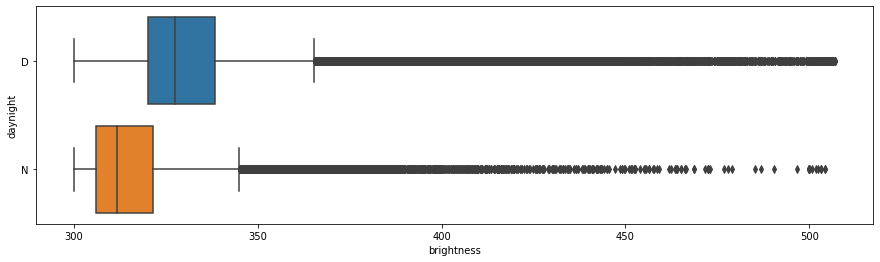

In [ ]:
# S2.1: Obtain boxplot for brightness with respect to daynight

plt.figure(figsize = (15, 4))
sns.boxplot(y = 'daynight', x = 'brightness', data = maps_df)
plt.show()

Here we see the distribution of temperature has a lot of outliers which exhibit higher fire temperature values. Hence, we can say that extreme fire events are not that common and majority of the bushfire events lie within lower range.

<br>

Let's use the `quantile()` function and understand the distribution of the bushfire temperature.

In [ ]:
# S2.2: Obtain the distribution of fire temperature based on quantiles

maps_df['brightness'].quantile([0, 0.25, 0.5, 0.75, 1])

0.00    300.0
0.25    317.2
0.50    325.5
0.75    336.4
1.00    507.0
Name: brightness, dtype: float64

From the above code cell we can say that our speculation was correct and 75% of all the fire events occured exhibit a temperature range of: 300 to 336.4 Kelvin. This information can be used to categorize fire events based on the temperature range.

<br>

Let us categorise the fires based on the temperature using the temperature range obtained from `quantile()` function as follows:

1. `Low`: fires having temperature below 317.2 K

2. `Medium`: fires ranging from 317.3 K to 325.5 K

3. `High`: fires ranging from 325.6 K to 336 K

4. `Extreme`: fires ranging from 336.5 K and higher

For this, create a function say: `brightness_categorizer`. In this function, create `if` loop based conditions to categorize fires based on the temperature values as given above.



In [ ]:
# T2.1: Function to categorize fires based on their brightness

def brightness_categorizer(brightness):
    if brightness <= 317.2:
      return 'Low'

    elif 317.3 <= brightness <= 325.5:
      return 'Medium'

    elif 325.6 <= brightness <=336:
      return 'High'

    else:
      return 'Extreme'

Next, define a new feature column say: `fire_temperature` and assign the categorical temperature range for the respective data row in the `fire_temperature` column. For this, `apply` the function defined above to the respective column (`brightness`) of the DataFrame.

In [ ]:
# S2.3: Create a new column by categorizing brightness and get the count of the fire events basd on the temperature

maps_df['fire_temperature'] = maps_df['brightness'].apply(brightness_categorizer)


Next, obtain the fire events falling into each of the categories using the `value_counts()` function.

In [ ]:
# S2.4: Count the instances of the mapped values in the 'brightness_temperature' column.
maps_df['fire_temperature'].value_counts(dropna = False)

Extreme    63486
Low        62276
Medium     61960
High       60554
Name: fire_temperature, dtype: int64

**Note:** After mapping the values of a column to a new set of values, it is a good practice to use `dropna = False` input to the `value_counts()` function. It will return the count of `Nan` values if there are unmapped values in the new column.

<br>

The DataFrame is now ready to obtain Choropleth maps. In next section we will proceed with Choropleth maps using `maps_df` DataFrame.

---

#### Activity 3: Choropleth Maps

Python offers multiple options to draw maps/cartograms. Some of them are:

1. Folium

2. Plotly

As we have already worked on `Folium` let us explore `Plotly` maps in this class.

Plotly supports two different kind of map services:

  A. Mapbox maps

  B. Geo Maps

[Mapbox](https://www.mapbox.com/) is a popular map service provider. They provide custom online maps for numerous websites, corporate solutions and mobile applications, some of them include: Skyscanner, Xiaomi, Accuweather, Land Rover. It offers more flexibility when compared with other map providers such as Google Maps.

Mapbox also provides a public API which is free to use and plotly has integrated support for the public API of mapbox.

<br>

Let's start with a simple example of displaying the map of Australia using plotly Mapbox.

To display maps using plotly we need to import `graph_objects` package of plotly. `plotly.graph_objects` is a package which consists of numerous classes and functions which can be used to obtain Choropleth maps. For this:

1. Import the required library: `import plotly.graph_objects as go`

2. Define a figure object `fig` using `go.Figure()` constructor .  `go.Figure()` is a class which is used to create a new figure instance in plotly `graph_objects`.

3. Pass `go.Densitymapbox()` constructor as a parameter to `go.Figure()`. `go.Densitymapbox()` is a class which invokes the maps from the mapbox API and prepares the base layer for displaying the map.

    - Above steps creates a base layer for map display and will not display anything until we choose following parameters:

      - `mapbox_style`: As with other map services like google maps etc. we can choose the layout of the map we want to display using plotly. The most common layout is `open-street-map` which is like the default map interface when you open google maps.

      - `mapbox_center_lon`: Longitude value for center of the map

      - `mapbox_center_lat`: Latitude value for center of the map

4. These parameters have to be set using `fig.update_layout` as follows:

 - Use `mapbox_style = 'open-street-map'`.

 - Australia is located at: 25.2744° S, 133.7751° E . Mapbox accepts latitude as degress in North and longitude as degrees in East. Hence pass: latitude as -25, and longitude as 133

5. Finally use `fig.show()` to get the map.

**Note:**

For further readings visit:

1. [Graph Objects documentation page](https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html)

2. [Densitymapbox documentation page](https://plotly.github.io/plotly.py-docs/generated/plotly.graph_objects.Densitymapbox.html)

3. [fig.update_layout documentation page](https://plotly.com/python/reference/layout/)



In [ ]:
# T3.1: Display a street map of Australia

# Import the required library
import plotly.graph_objects as go

# Create a figure object
fig = go.Figure(go.Densitymapbox())

# Update the figure parameters
fig.update_layout(mapbox_style = 'open-street-map',
                  mapbox_center_lat = -25,
                  mapbox_center_lon = 133)

fig.show()

Here we observe that we have obtained an interactive graph object which displays the street map of Australia. Important things to note:

1. The center of the map is tiled to Australia as provided in `fig.update_layout()`

2. As with any standard map we can zoom in/out of the map:

 - Using mouse scroll function or,

 - Using $+$ and $-$ buttons provided in top right section of the map.

3. If we zoom in to Australia we can see its major territories are marked on the map for quick reference.

4. We can further zoom in to the map to see major cities.

5. If we zoom out we can notice entire world map is available and we can also acquire information for other countries as well.

6. As with any standard map we can drag and move the map to focus on the desired location.

7. The information icon (i) in the bottom right section of the map displays the layer information based on which the map has been created. In our case: OpenStreetMap contributors.

---

We can further change the `mapbox_style` and customise the map display as per our requirement. For instance, let us obtain a terrain map of Australia. For this:

1. Define a figure object `fig` using `go.Figure()` constructor.

2. Pass `go.Densitymapbox()` constructor as a parameter to `go.Figure()`

3.  Use `fig.update_layout` to set the parameters of the map as follows:

 - Set `mapbox_style = 'stamen-terrain'` which invokes the terrain map layer.
  
 - Specify the respective latitude and longitude.
  
 - In previous figure the map was not zoomed in to Australia. This can be done using `mapbox_zoom` parameter. Set `mapbox_zoom = 2.4` so that we get a zoomed in map display focused at Australia.

 - Set the title of the figure using `title = 'Australia Terrain map'`.

 - To display the map title at center use `title_x = 0.5`.

4. Finally use `fig.show()` to get the map.

In [ ]:
# S3.1: Display a terrain map of Australia

# Create a figure object
fig = go.Figure(go.Densitymapbox())

# Update the respective figure parameters
fig.update_layout(mapbox_style = 'stamen-terrain',
                  mapbox_center_lat = -25,
                  mapbox_center_lon = 134,
                  mapbox_zoom = 2.4, title = 'Australia Terrain Map',
                  title_x = 0.5)

fig.show()

Here we can observe that we have succesfully created a terrain map of Australia. You can also note:

1. The map is now zoomed in to Australia by default, since we had set a zoom factor of 2.4

2. The map layer now shows the terrain for various geographical locations which can be further examined in detail if we zoom into a particular location.

3. The information icon (i) in the bottom right section of the map displays the layer information based on which the map has been created. In our case: Map tiles by Stamen Design.

Till now we have used the `go.Densitymapbox()` to invoke the map and no parameter has been passed to customise the map.

Next, let's display the fire events on the map of Australia. For this we will use the `maps_df` DataFrame and pass the necessary paramteres to `go.Densitymapbox` constructor.


<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/097c539a-41ad-4008-ad9c-a1dfc2d2a13f.jpg width=650>

`Image source:` [`Australia Map`](https://www.pexels.com/photo/australia-map-68704/)</center>

---

#### `go.Densitymapbox()`

In order to obtain a map of Australia with markings for various fire events let us explore `go.Densitymapbox()`. It enables users to control and customise the map layers, the information to be displayed within map and other map features.

Reduced Syntax:```class plotly.graph_objects.Densitymapbox( lat=None, lon=None, z=None, radius=None, colorscale=None, customdata=None, hovertemplate=None)```

Parameters:

- `lat` – Sets the latitude coordinates (in degrees North)

- `lon` – Sets the longitude coordinates (in degrees East)

- `z` – Sets the individual points weight. For example, a value of 10 would be equivalent to having 10 points of weight 1 in the same spot

- `radius` – Sets the radius of influence of one lon / lat point in pixels. Increasing the value makes the densitymapbox trace smoother, but less detailed.

- `colorscale` – Sets the colorscale to represent the color of individual points based on `z` value.

- `customdata` – Assigns extra data each marker point. This is particularly useful when we want to display information other than `lat` and `lot` to the hover pointer.

- `hovertemplate` – Template string used for rendering the information to appear on hover box. Variables are inserted using %{variable}, for example 'lat: %{lat}', 'lon': %{lon}, and so on. To insert `customdata` in hover box specify the variable as %{customdata} along with the respective name of the variable to be displayed on the hover box.

**NOTE:** `go.Densitymapbox()` class provides several other controls and customisation over map features. Visit [official documentation page](https://plotly.github.io/plotly.py-docs/generated/plotly.graph_objects.Densitymapbox.html) for further reading.

<br>

Now let's obtain a Choropleth map to identify the various fire events occured in Australia from '1-January-2020' till '31-August-2021'.For this:

1. Define a figure object `fig` using `go.Figure()` constructor.

2. In `go.Figure()` pass `go.Densitymapbox()` constructor with following parameters:

 - `lat`: latitude values from the the respective column of `maps_df` DataFrame.

 - `lon`: longitude values from the the respective column of `maps_df` DataFrame.

 - `z = maps_df.brightness` to display fire events as points based on the temperature of the corresponding fire event.

 - `radius = 5` to size the individual marker points based on the `z` parameter. (The marker point with mimimum value of `z` will have a radius of 1. similarly, the marker point with maximum value of `z` will have a radius of 5.

 - `customdata = maps_df.acq_date`: It is a good idea to represent the date of the fire event as well for meaningful analysis of Choropleth maps.

 - `colorscale = 'reds'`: It will assign the color scale to individual points based on `brightness` of the corresponding fire event.

 - `hovertemplate='latitude: %{lat}, longitude: %{lon} <br> temperature: %{z}, Date: %{customdata}'`: In order to extract most information we should display the: `latitude`, `longitude`, `brightness`, `acq_date` of each fire event in the hover box. The <br> informs compiler to display rest of the information in next line.

3.  Use `fig.update_layout` to set the parameters of the map as follows:

 - Set `mapbox_style = 'stamen-terrain'` which invokes the terrain map layer.
  
 - Specify the map's center latitude and longitude.
  
 - Set `mapbox_zoom = 2.4` so that we get a zoomed in map display focused at Australia.

 - Set the title of the figure using `title = 'Australia Fires Choropleth Map'`

 - To display the map title at center use `title_x = 0.5`

4. Finally use `fig.show()` to get the map.






In [ ]:
# S3.2: Display the map of Australia with fire events

# Create a figure object using parameters from the respective DataFrame
fig = go.Figure(go.Densitymapbox(lat = maps_df.latitude,
                                 lon = maps_df.longitude,
                                 z = maps_df.brightness,
                                 radius=5, colorscale ='reds', customdata = maps_df.acq_date,
                                 hovertemplate='latitude: %{lat}, longitude: %{lon} <br> temperature: %{z}, Date: %{customdata}'))

# Update the figure parameters
fig.update_layout(mapbox_style='stamen-terrain',
                  mapbox_center_lat=-25,
                  mapbox_center_lon=134,
                  mapbox_zoom=2.4, title = 'Australia Fires Choropleth Map',
                  title_x = 0.5)

fig.show()

Here, we observe that:

1. Various fire events have been marked against the respective latitude and longitude.

2. The overlapping points result in a dense number of points thereby darkening the colorscale of the respective area.

3. You can zoom in particular location in order to analyse the fire events of that region/city in sufficient detail.

4. After zooming in the overlapping of fire event points decreases upto a greater extent, hence we can analyse the fire events at coprresponding location with better accuracy.

4. The hover box displays sufficent detail to obtain information on the corresponding fire event.

5. We can always further customise the map using other parameters in `go.Densitymapbox()` class.

<br>

However, the above Choropleth maps still packs a lot of data points onto a single map. A good idea would be to obtain maps with a slider control for date so that we can analyse the occurences of fire events with respect to date.

<br>

Let's stop here. In the next class we will:

1. Obtain a more interactive Choropleth map with slider control to view the fire events with respect to date using `plotly.express`.

2. Perform detailed EDA in order to understand the fire events in detail.

---

#### Activities


**Teacher Activities:**

1.   Geospatial Analysis - Choropleth Maps I (Class Copy)

    Link on Panel


2.  Geospatial Analysis - Choropleth Maps I (Reference)

    Link on Panel

